# KNN을 활용한 분류(다진) 문제

### iris 데이터 분류


In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

# 데이터의 키를 확인하라
iris.keys()
# iris.values()
# iris.items()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# iris 데이터를 pandas의 데이터프레임으로 변경해보세요.
# 가장 마지막 열은 target으로 설정하세요.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(iris.data, columns=iris["feature_names"])
# target은 맨 끝에 뒤어라
df["target"] = iris.target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# 'target' 열을 삭제한 데이터프레임
df.drop(['target'], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [102]:
# 성능 측정을 위해서 random_state=42가 있어야 한다.
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df['target'], test_size=0.2, random_state=42)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
knn = KNeighborsClassifier()
# 학습
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
# 예측
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))
print(np.mean(y_pred == y_test))

1.0
1.0


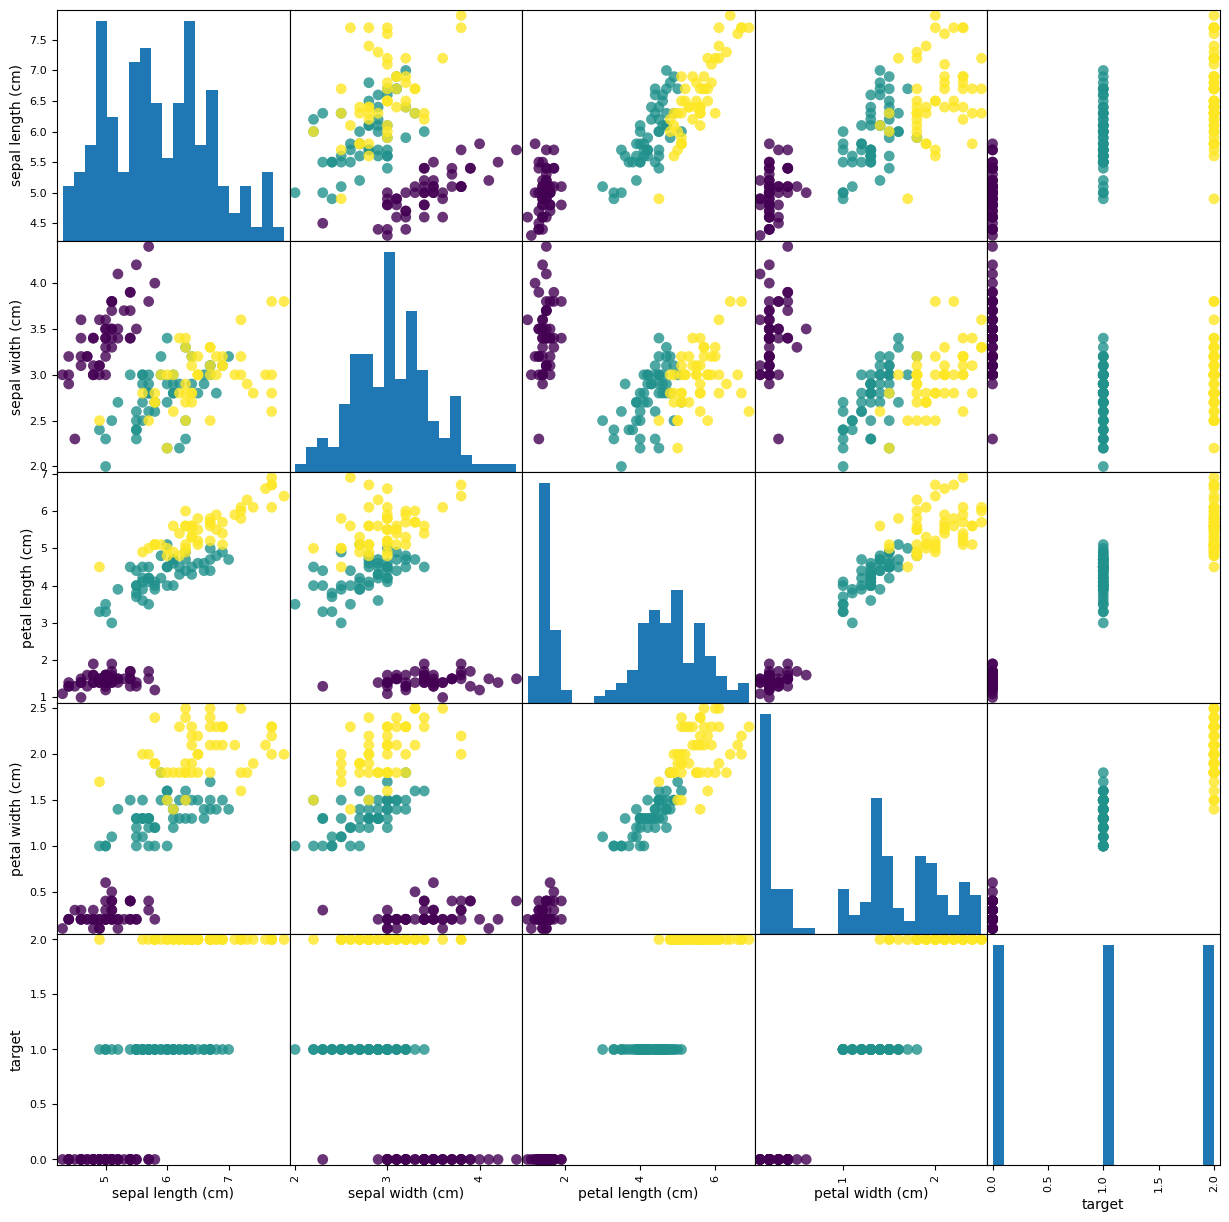

In [91]:
pd.plotting.scatter_matrix(
    df,
    c=df["target"],
    figsize=(15, 15),
    marker="o",
    hist_kwds={"bins": 20},
    s=60,
    alpha=0.8,
)
plt.show()